In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pandas_datareader import data as pdr

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Import yfinance
import yfinance as yf

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Creating an empty DataFrame to store the concatenated data
all_data = pd.DataFrame()

for stock in tech_list:
    # Download data directly using yfinance
    data = yf.download(stock, start=start, end=end)
    data['company_name'] = stock  # Add a column for the company name
    all_data = pd.concat([all_data, data], axis=0)

# Check the last 10 entries in the DataFrame
all_data.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                     Adj Close Close High  Low Open Volume company_name  \
Ticker                         AAPL  AAPL AAPL AAPL AAPL   AAPL                
Date                                                                           
2024-10-15 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-16 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-17 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-18 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-21 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-22 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-23 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-25 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   
2024-10-28 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         NVDA   

Price                     Adj Close Close High  ...       Low Open Volume  \
Ticker                         GOOG  GOOG GOOG  ... TSLA TSLA TSLA   TSLA   
Date                                            ...                         
2024-10-15 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-16 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-17 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-18 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-21 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-22 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-23 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-25 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   
2024-10-28 00:00:00+00:00       NaN   NaN  NaN  ...  NaN  NaN  NaN    NaN   

Price                       Adj Close       Close        High         Low  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Date                                                                        
2024-10-15 00:00:00+00:00  131.600006  131.600006  138.570007  128.740005   
2024-10-16 00:00:00+00:00  135.720001  135.720001  136.619995  131.580002   
2024-10-17 00:00:00+00:00  136.929993  136.929993  140.889999  136.869995   
2024-10-18 00:00:00+00:00  138.000000  138.000000  138.899994  137.279999   
2024-10-21 00:00:00+00:00  143.710007  143.710007  143.710007  138.000000   
2024-10-22 00:00:00+00:00  143.589996  143.589996  144.419998  141.779999   
2024-10-23 00:00:00+00:00  139.559998  139.559998  142.429993  137.460007   
2024-10-24 00:00:00+00:00  140.410004  140.410004  141.350006  138.460007   
2024-10-25 00:00:00+00:00  141.539993  141.539993  144.130005  140.800003   
2024-10-28 00:00:00+00:00  140.520004  140.520004  143.139999  140.050003   

Price                            Open       Volume  
Ticker                           NVDA         NVDA  
Date                                                
2024-10-15 00:00:00+00:00  137.869995  377831000.0  
2024-10-16 00:00:00+00:00  133.979996  264879700.0  
2024-10-17 00:00:00+00:00  139.339996  306435900.0  
2024-10-18 00:00:00+00:00  138.669998  176090200.0  
2024-10-21 00:00:00+00:00  138.130005  264554500.0  
2024-10-22 00:00:00+00:00  142.910004  226311600.0  
2024-10-23 00:00:00+00:00  142.029999  285930000.0  
2024-10-24 00:00:00+00:00  140.820007  172354900.0  
2024-10-25 00:00:00+00:00  140.929993  205122100.0  
2024-10-28 00:00:00+00:00  143.000000  173031000.0  

[10 rows x 37 columns]

In [ ]:
pip install pandas-datareader

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'NVDA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NVDA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"," TESLA", "NVDIA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)
df.head(100)


Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-10-30 00:00:00+00:00  169.423035  170.289993  171.169998  168.869995   
2023-10-31 00:00:00+00:00  169.900604  170.770004  170.899994  167.899994   
2023-11-01 00:00:00+00:00  173.084305  173.970001  174.229996  170.119995   
2023-11-02 00:00:00+00:00  176.665985  177.570007  177.779999  175.460007   
2023-11-03 00:00:00+00:00  175.750656  176.649994  176.820007  173.350006   
...                               ...         ...         ...         ...   
2024-03-18 00:00:00+00:00  173.284119  173.720001  177.710007  173.520004   
2024-03-19 00:00:00+00:00  175.638199  176.080002  176.610001  173.029999   
2024-03-20 00:00:00+00:00  178.221710  178.669998  178.669998  175.089996   
2024-03-21 00:00:00+00:00  170.940018  171.369995  177.490005  170.839996   
2024-03-22 00:00:00+00:00  171.847733  172.279999  173.050003  170.059998   

Price                            Open       Volume company_name Adj Close  \
Ticker                           AAPL         AAPL                   GOOG   
Date                                                                        
2023-10-30 00:00:00+00:00  169.020004   51131000.0        APPLE       NaN   
2023-10-31 00:00:00+00:00  169.350006   44846000.0        APPLE       NaN   
2023-11-01 00:00:00+00:00  171.000000   56934900.0        APPLE       NaN   
2023-11-02 00:00:00+00:00  175.520004   77334800.0        APPLE       NaN   
2023-11-03 00:00:00+00:00  174.240005   79763700.0        APPLE       NaN   
...                               ...          ...          ...       ...   
2024-03-18 00:00:00+00:00  175.570007   75604200.0        APPLE       NaN   
2024-03-19 00:00:00+00:00  174.339996   55215200.0        APPLE       NaN   
2024-03-20 00:00:00+00:00  175.720001   53423100.0        APPLE       NaN   
2024-03-21 00:00:00+00:00  177.050003  106181300.0        APPLE       NaN   
2024-03-22 00:00:00+00:00  171.759995   71106600.0        APPLE       NaN   

Price                     Close High  ...       Low Open Volume Adj Close  \
Ticker                     GOOG GOOG  ... TSLA TSLA TSLA   TSLA      NVDA   
Date                                  ...                                   
2023-10-30 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-10-31 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-01 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-02 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-11-03 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
...                         ...  ...  ...  ...  ...  ...    ...       ...   
2024-03-18 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2024-03-19 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2024-03-20 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2024-03-21 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2024-03-22 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   

Price                     Close High  Low Open Volume  
Ticker                     NVDA NVDA NVDA NVDA   NVDA  
Date                                                   
2023-10-30 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-10-31 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-01 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-02 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-11-03 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
...                         ...  ...  ...  ...    ...  
2024-03-18 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2024-03-19 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2024-03-20 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2024-03-21 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2024-03-22 00:00:00+00:00   NaN  Na

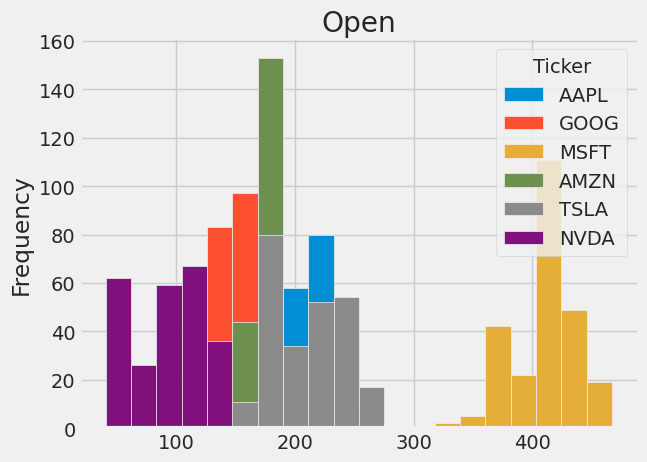

In [ ]:
# @title Open

from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
AAPL.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,89.522358,91.212940,87.626148,89.520470,89.508771,4.173295e+08
std,30.359602,31.002798,29.510541,30.243963,30.245874,1.444433e+08
min,40.450001,40.879002,39.230000,40.326000,40.313805,1.702095e+08
25%,59.809500,60.120501,58.827499,59.763500,59.750679,3.114828e+08
50%,89.796997,91.194000,88.231003,90.250000,90.234863,3.996780e+08
75%,118.450500,121.145000,116.174999,118.035000,118.024902,4.848052e+08
max,139.800003,140.889999,137.279999,138.070007,138.070007,1.142269e+09


from matplotlib import pyplot as plt
_df_24['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
MSFT.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,407.837091,410.817053,404.221235,407.722709,406.460706,2.164179e+07
std,28.098124,28.052215,27.828489,27.953530,28.512384,8.393676e+06
min,325.470001,331.839996,324.390015,326.670013,324.236267,9.932800e+06
25%,393.845001,399.635010,389.645004,395.044998,393.937180,1.632015e+07
50%,413.440002,415.859985,409.089996,413.640015,412.232086,1.960950e+07
75%,424.570007,427.389999,420.464996,424.544998,423.468933,2.436140e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,7.847820e+07


In [ ]:
TSLA.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,208.155060,212.262590,203.905896,208.089642,208.089642,9.952221e+07
std,29.846179,30.294351,29.115454,29.735416,29.735416,3.082949e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,4.952680e+07
25%,181.900002,184.419998,176.959999,180.000000,180.000000,7.735860e+07
50%,210.000000,214.800003,205.770004,208.800003,208.800003,9.573710e+07
75%,234.114998,238.855003,231.344994,235.514999,235.514999,1.171180e+08
max,263.660004,271.000000,257.859985,263.260010,263.260010,2.438697e+08


In [ ]:
GOOG.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,156.453570,158.004725,155.038119,156.513904,156.226951,2.030270e+07
std,17.004006,17.137136,16.865025,16.950442,16.980028,8.446971e+06
min,124.029999,124.440002,121.459999,123.400002,123.097694,7.409100e+06
25%,140.830002,142.939003,139.954994,141.360001,141.013702,1.517830e+07
50%,157.190002,158.681000,156.110001,157.460007,157.074265,1.813850e+07
75%,169.180000,170.310005,166.765007,168.820000,168.568001,2.252615e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,5.972800e+07


In [ ]:
AMZN.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,171.506016,173.220080,169.637371,171.546016,171.546016,4.334563e+07
std,17.937321,17.945362,17.643454,17.715338,17.715338,1.715521e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,2.236620e+07
25%,155.214996,157.110001,153.914993,155.269997,155.269997,3.206920e+07
50%,177.490005,178.899994,175.259995,177.229996,177.229996,3.993190e+07
75%,184.580002,186.555000,182.864998,184.824997,184.824997,4.847775e+07
max,200.089996,201.199997,199.050003,200.000000,200.000000,1.414484e+08


In [ ]:
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,89.522358,91.212940,87.626148,89.520470,89.508771,4.173295e+08
std,30.359602,31.002798,29.510541,30.243963,30.245874,1.444433e+08
min,40.450001,40.879002,39.230000,40.326000,40.313805,1.702095e+08
25%,59.809500,60.120501,58.827499,59.763500,59.750679,3.114828e+08
50%,89.796997,91.194000,88.231003,90.250000,90.234863,3.996780e+08
75%,118.450500,121.145000,116.174999,118.035000,118.024902,4.848052e+08
max,139.800003,140.889999,137.279999,138.070007,138.070007,1.142269e+09


In [ ]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-10-25 00:00:00+00:00 to 2024-10-24 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  252 non-null    float64
 1   (Close, MSFT)      252 non-null    float64
 2   (High, MSFT)       252 non-null    float64
 3   (Low, MSFT)        252 non-null    float64
 4   (Open, MSFT)       252 non-null    float64
 5   (Volume, MSFT)     252 non-null    int64  
 6   (company_name, )   252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


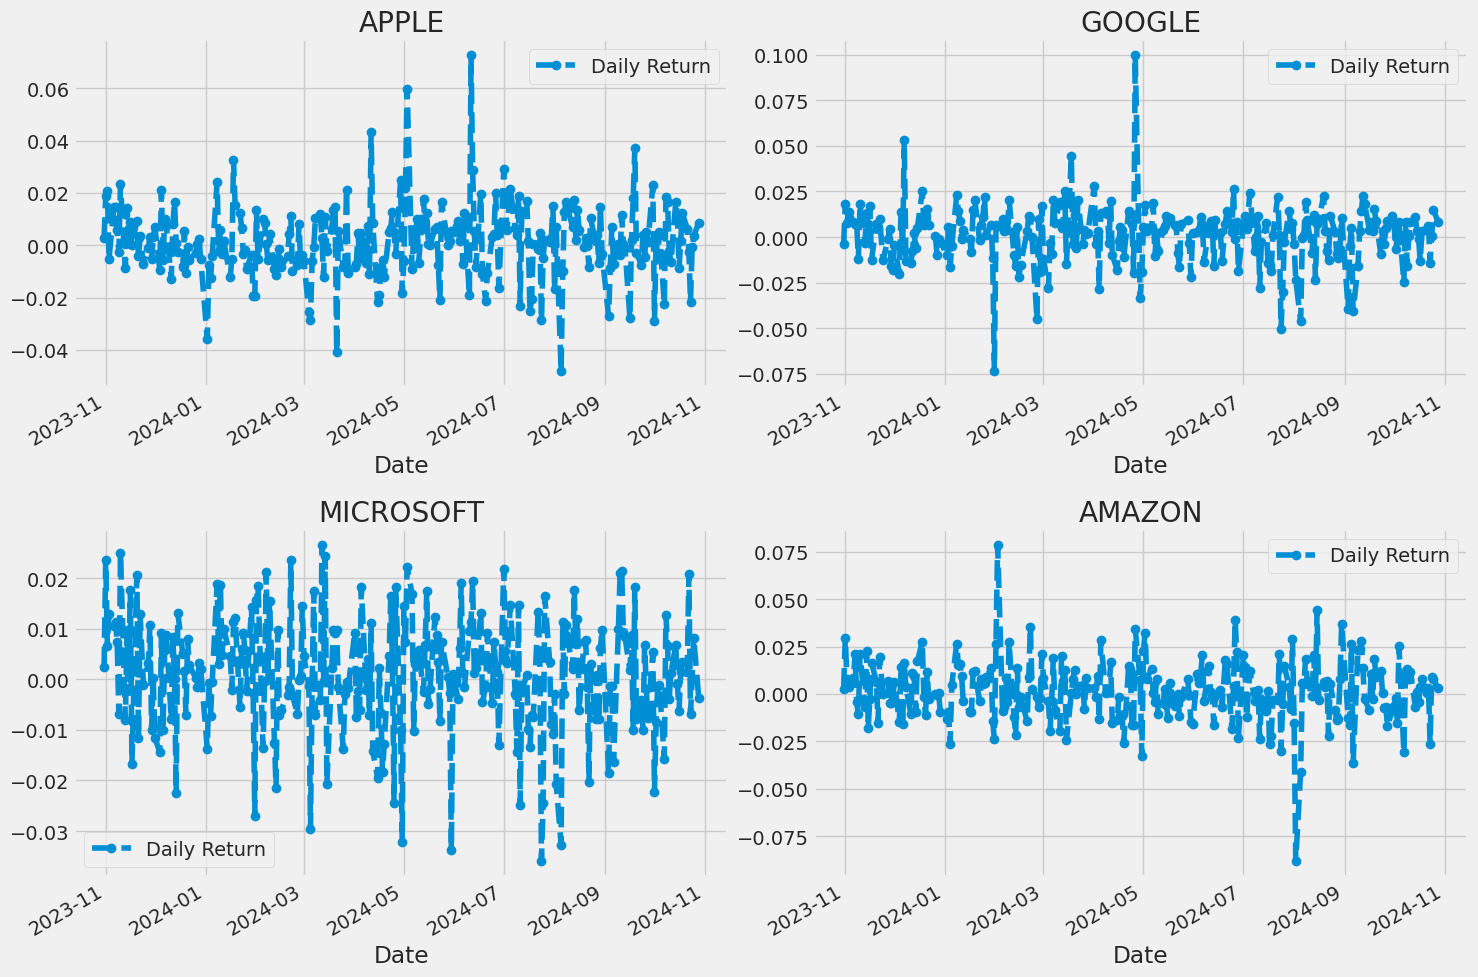

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

<ipython-input-17-2cceec65f378>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
<ipython-input-17-2cceec65f378>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
<ipython-input-17-2cceec65f378>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
<ipython-input-17-2cceec65f378>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
<ipython-input-17-2cceec65f378>:5: MatplotlibDeprecationWarning: Auto-removal of

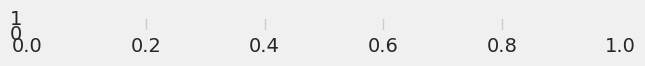

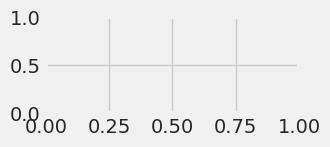

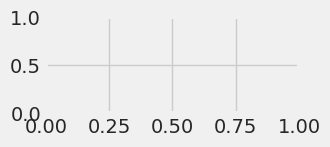

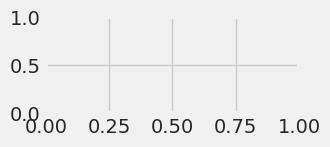

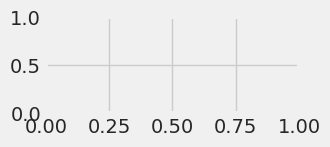

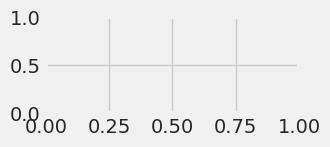

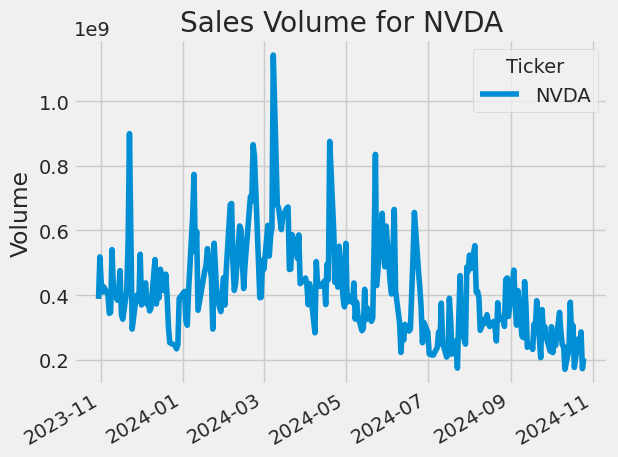

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()


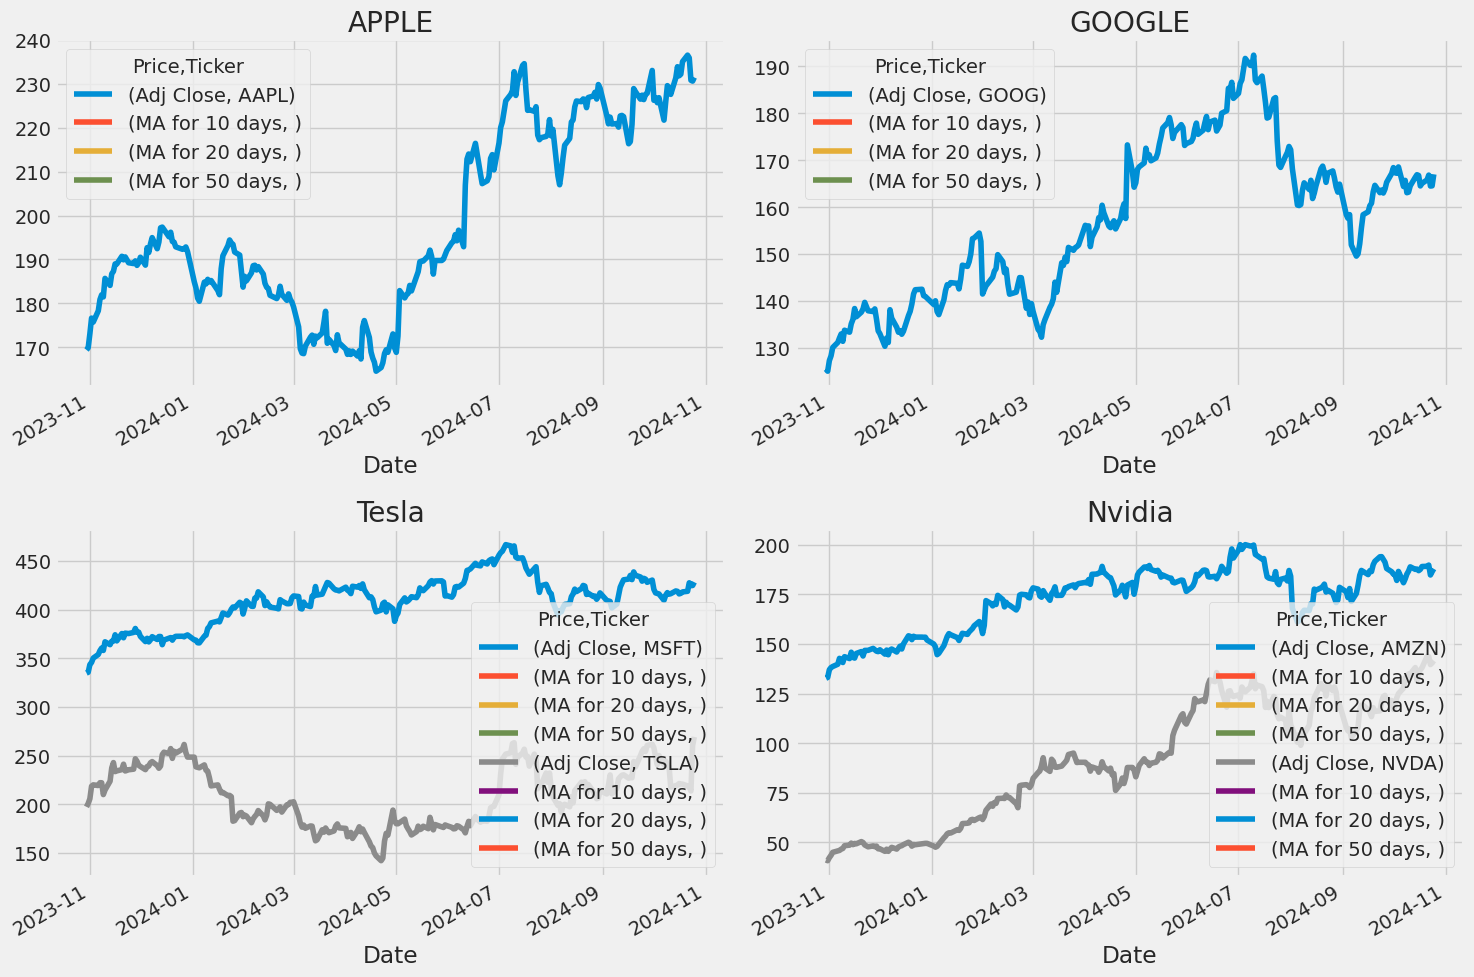

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Tesla')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Nvidia')

fig.tight_layout()

[*********************100%***********************]  4 of 4 completed


Ticker                         AAPL      AMZN      GOOG      MSFT
Date                                                             
2023-10-30 00:00:00+00:00       NaN       NaN       NaN       NaN
2023-10-31 00:00:00+00:00  0.002819  0.002863 -0.003578  0.002372
2023-11-01 00:00:00+00:00  0.018739  0.029379  0.018116  0.023543
2023-11-02 00:00:00+00:00  0.020693  0.007810  0.007917  0.006502
2023-11-03 00:00:00+00:00 -0.005181  0.003839  0.013921  0.012862


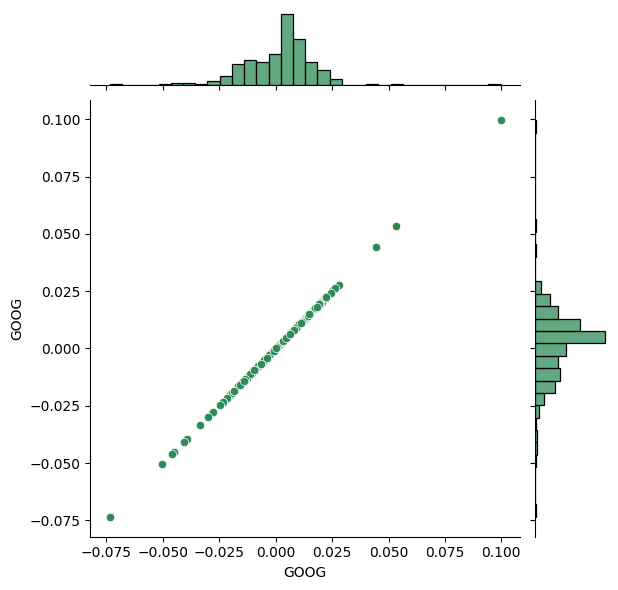

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Define stocks and time frame
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data
data = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate daily returns
tech_rets = data.pct_change()

# Check the first few rows to ensure it's loaded correctly
print(tech_rets.head())

# Check if 'GOOG' column exists
if 'GOOG' in tech_rets.columns:
    sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
    plt.show()
else:
    print("Column 'GOOG' does not exist in tech_rets DataFrame.")

In [ ]:
import yfinance as yf

# Define the ticker list
tech_list = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA']

# Set the start and end dates
start = '2020-01-01'
end = '2021-01-01'

# Download the data
data = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate the percentage change
tech_rets = data.pct_change()
print(tech_rets.head())

[*********************100%***********************]  6 of 6 completed


Ticker                         AAPL      AMZN      GOOG      MSFT      NVDA  \
Date                                                                          
2020-01-02 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2020-01-03 00:00:00+00:00 -0.009722 -0.012139 -0.004907 -0.012452 -0.016006   
2020-01-06 00:00:00+00:00  0.007968  0.014886  0.024657  0.002585  0.004194   
2020-01-07 00:00:00+00:00 -0.004703  0.002092 -0.000624 -0.009118  0.012107   
2020-01-08 00:00:00+00:00  0.016086 -0.007809  0.007880  0.015928  0.001875   

Ticker                         TSLA  
Date                                 
2020-01-02 00:00:00+00:00       NaN  
2020-01-03 00:00:00+00:00  0.029633  
2020-01-06 00:00:00+00:00  0.019255  
2020-01-07 00:00:00+00:00  0.038801  
2020-01-08 00:00:00+00:00  0.049205  


In [ ]:
pip install --upgrade yfinance

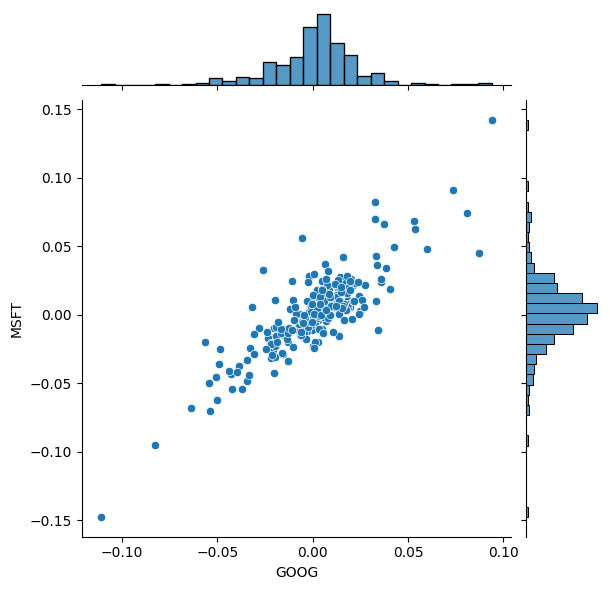

In [ ]:
import seaborn
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

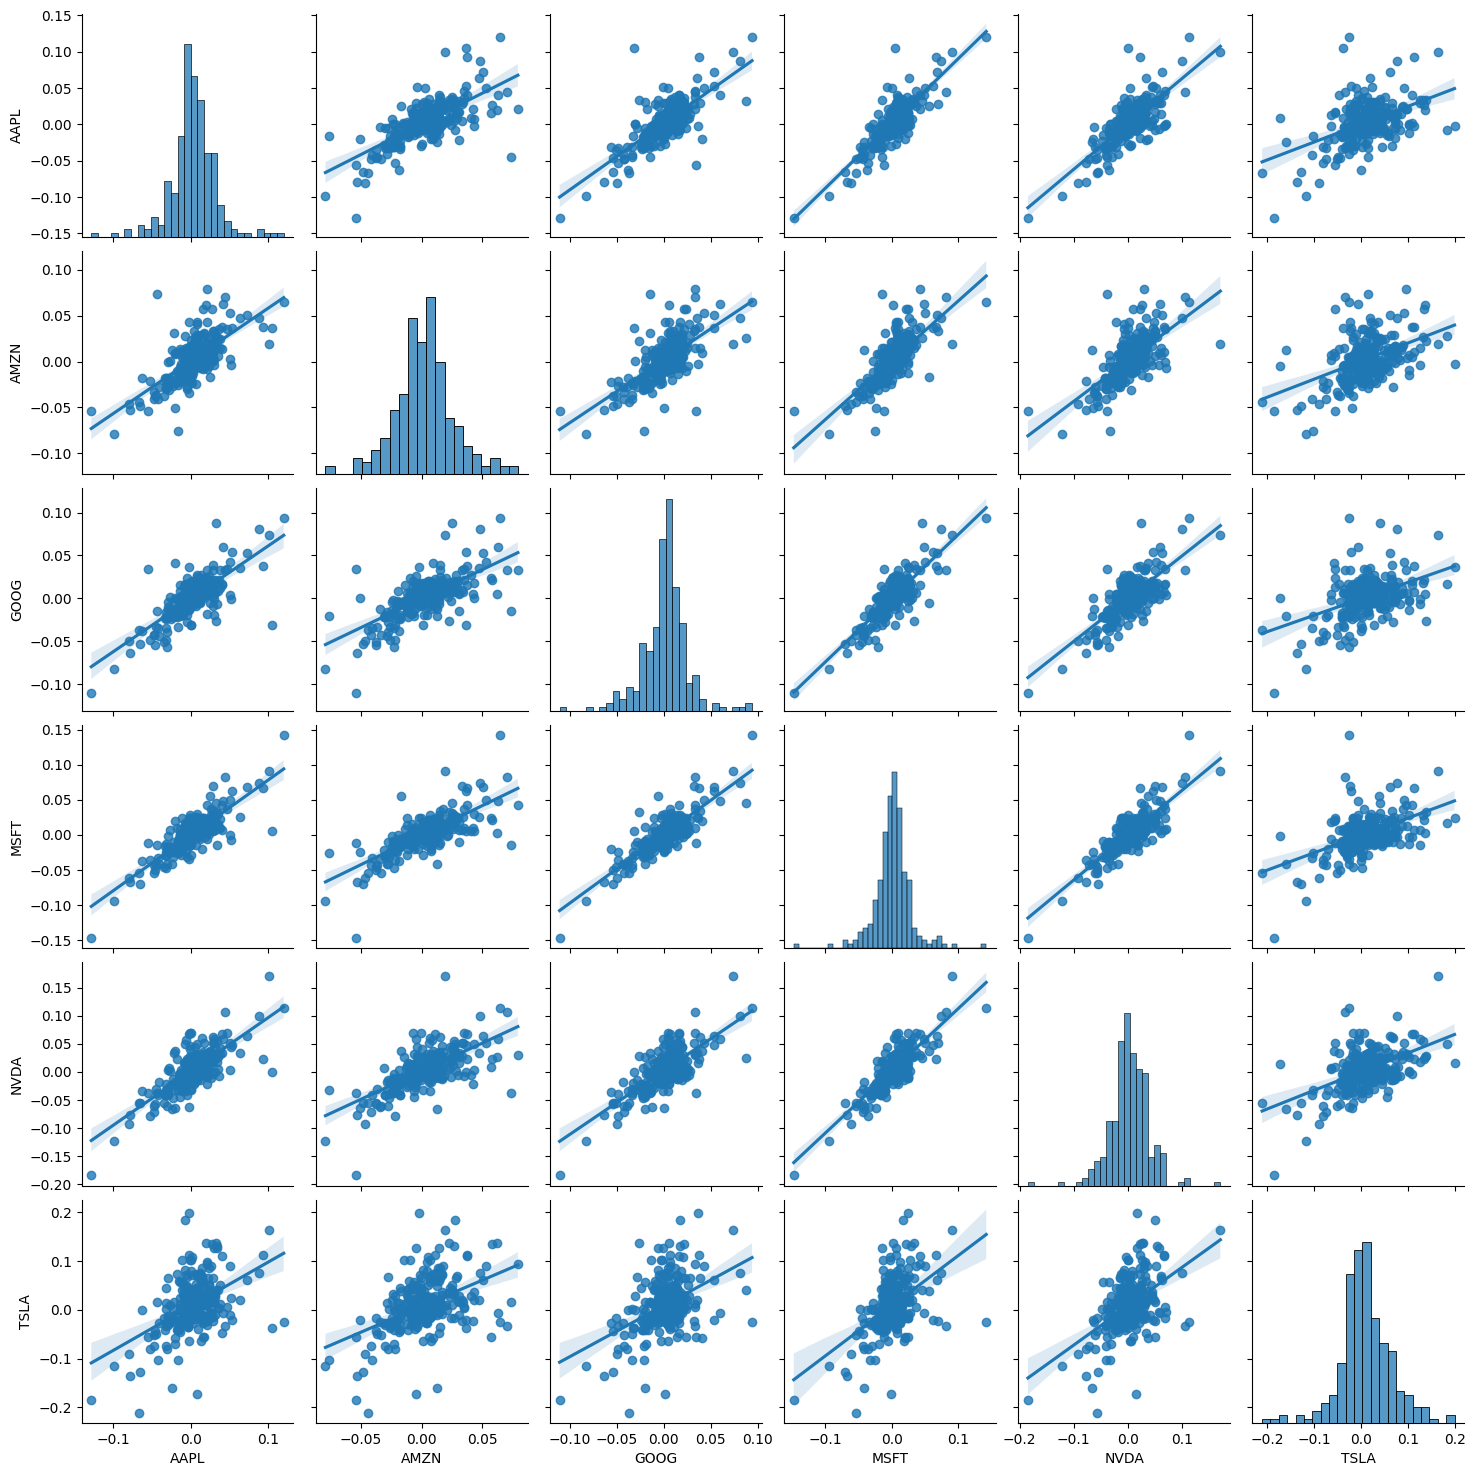

In [ ]:
sns.pairplot(tech_rets, kind='reg')

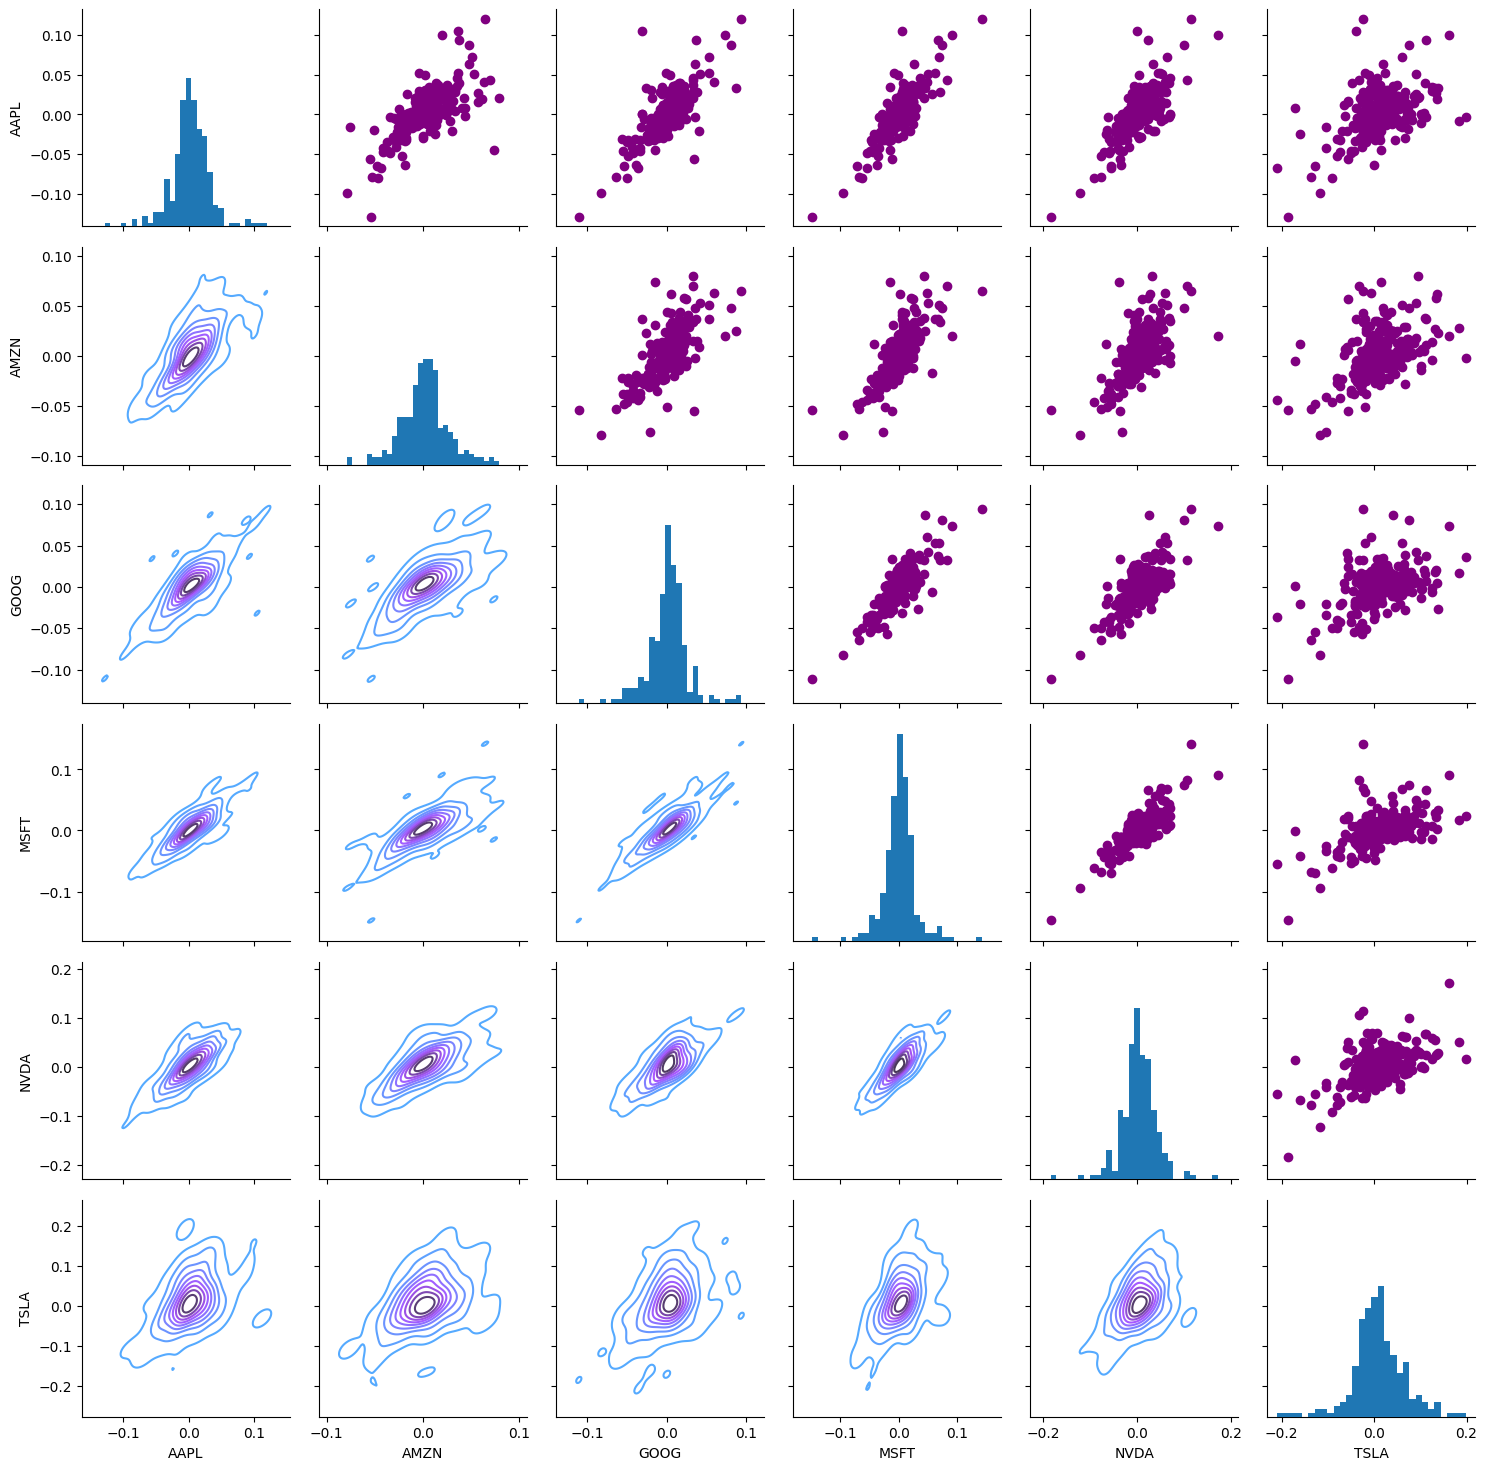

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())


return_fig.map_upper(plt.scatter, color='purple')


return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)


In [ ]:
stocks = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA']
data = yf.download(stocks, start="2023-09-01", end="2024-10-01")
closing_df = data['Close']

[*********************100%***********************]  6 of 6 completed


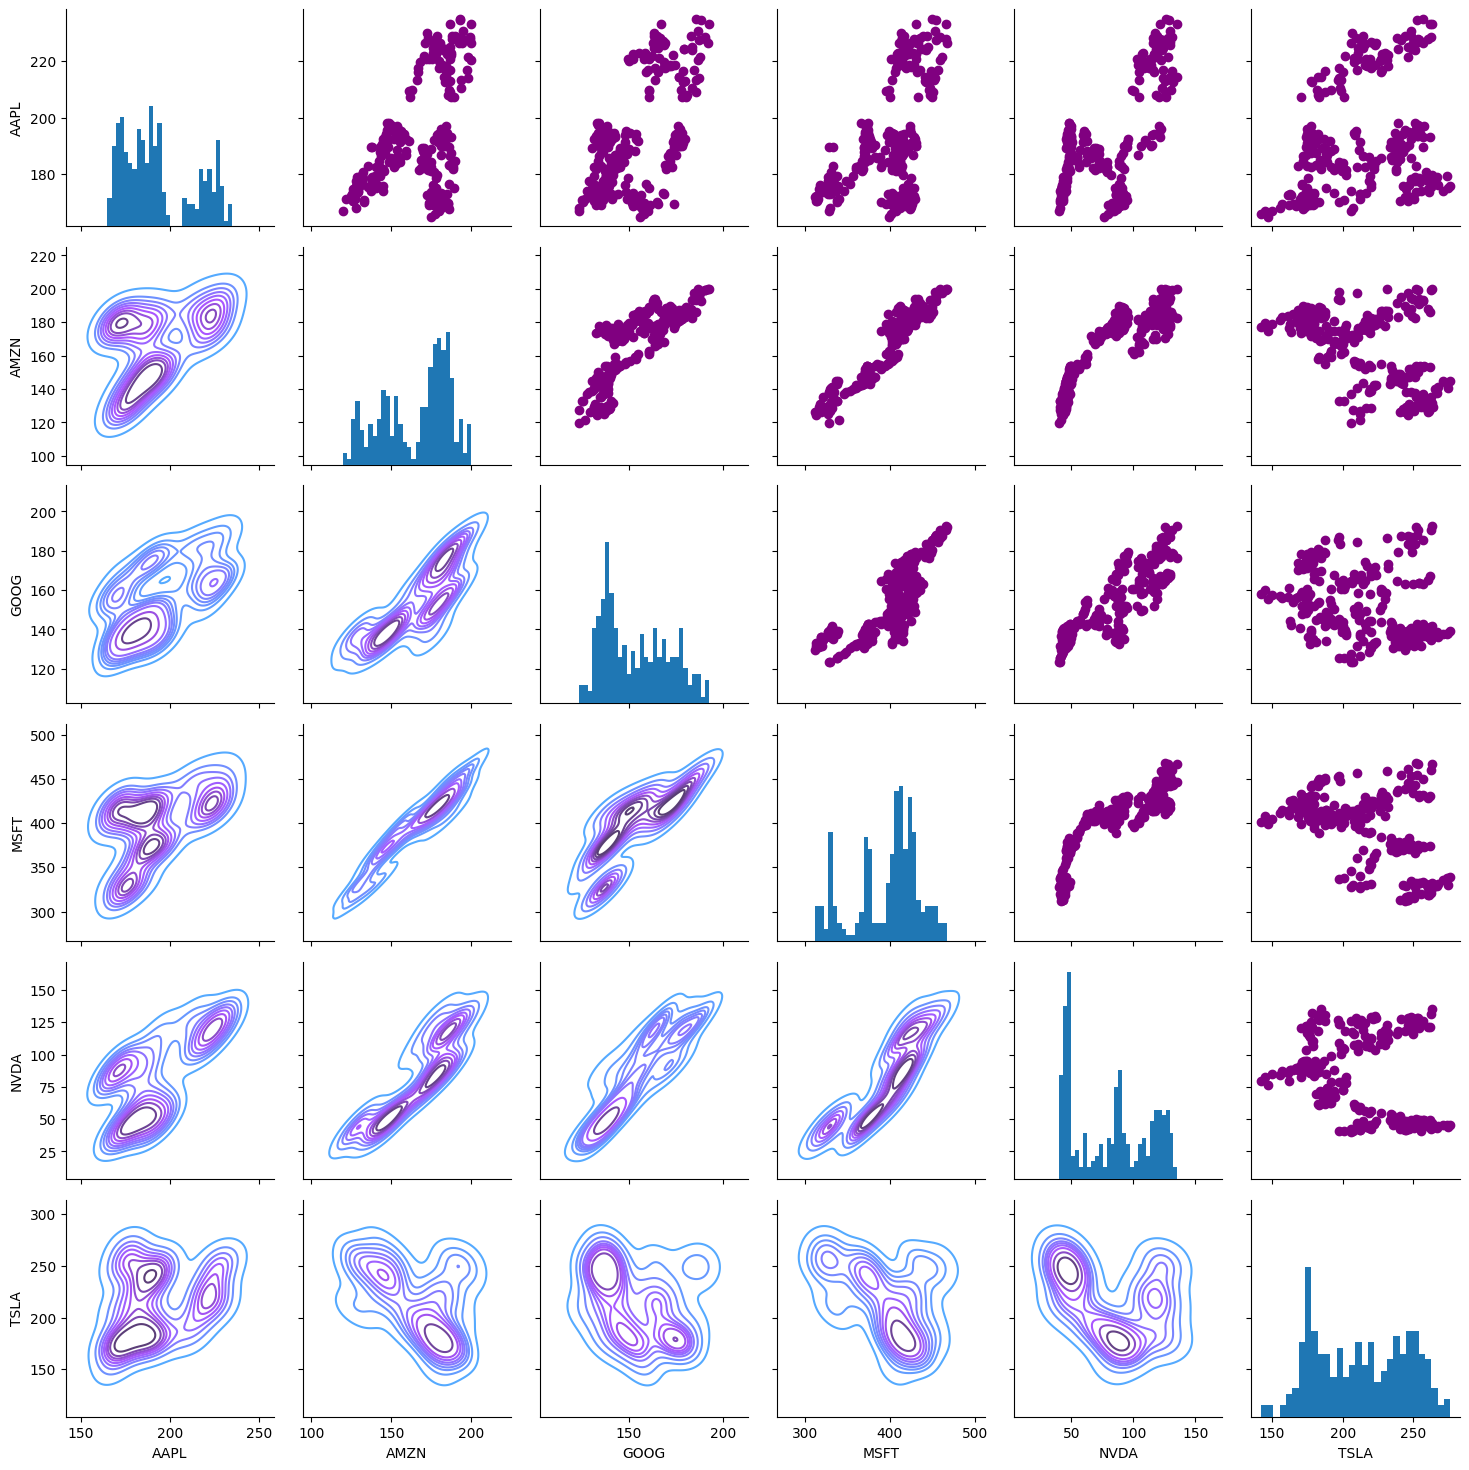

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

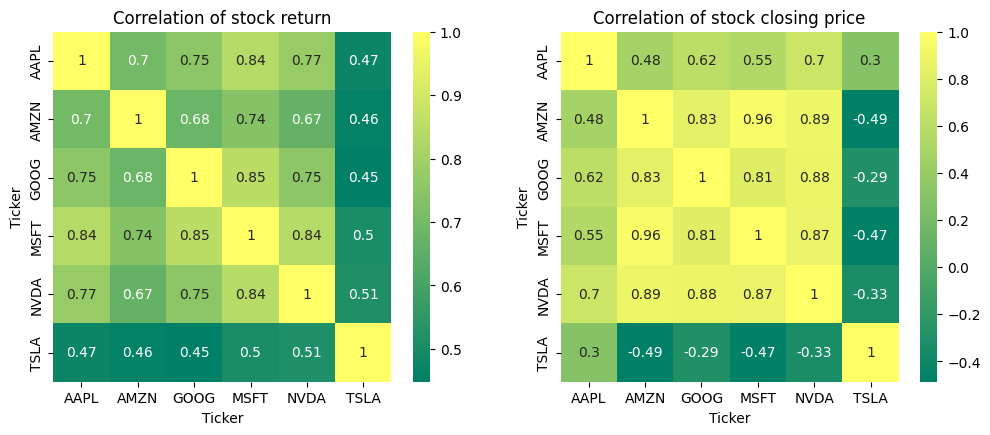

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')


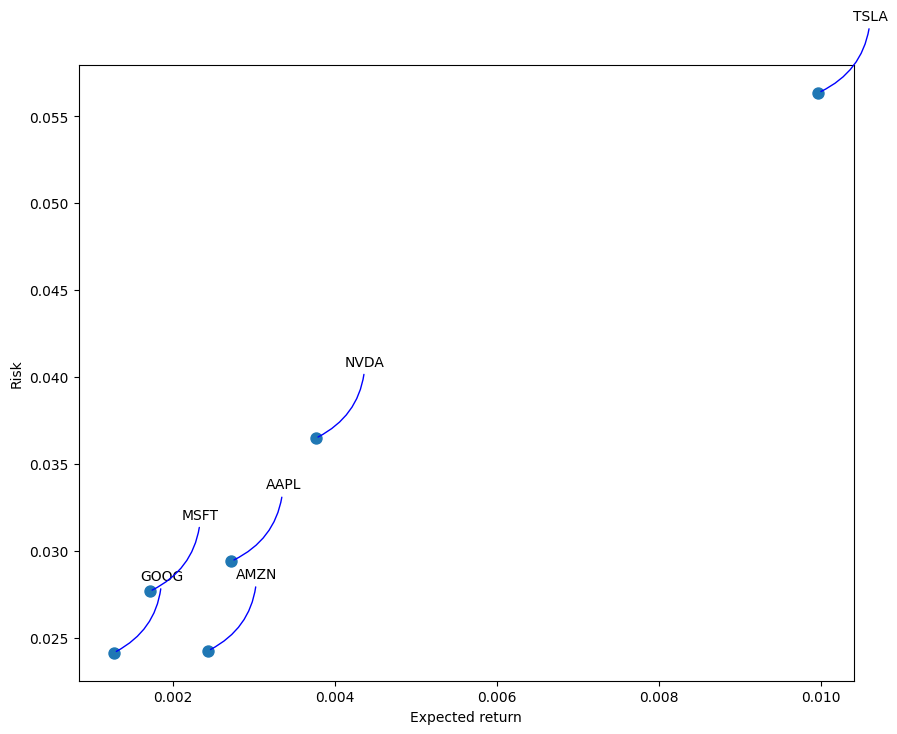

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [ ]:
pip install pandas-datareader

In [ ]:
import yfinance as yf

# Fetch data
df = yf.download('AAPL', start='2005-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Show the data
print(df)


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2005-01-03 00:00:00+00:00    0.954409    1.130179    1.162679    1.117857   
2005-01-04 00:00:00+00:00    0.964210    1.141786    1.169107    1.124464   
2005-01-05 00:00:00+00:00    0.972655    1.151786    1.165179    1.143750   
2005-01-06 00:00:00+00:00    0.973409    1.152679    1.159107    1.130893   
2005-01-07 00:00:00+00:00    1.044284    1.236607    1.243393    1.156250   
...                               ...         ...         ...         ...   
2024-10-22 00:00:00+00:00  235.860001  235.860001  236.220001  232.600006   
2024-10-23 00:00:00+00:00  230.759995  230.759995  235.139999  227.759995   
2024-10-24 00:00:00+00:00  230.570007  230.570007  230.820007  228.410004   
2024-10-25 00:00:00+00:00  231.410004  231.410004  233.220001  229.570007   

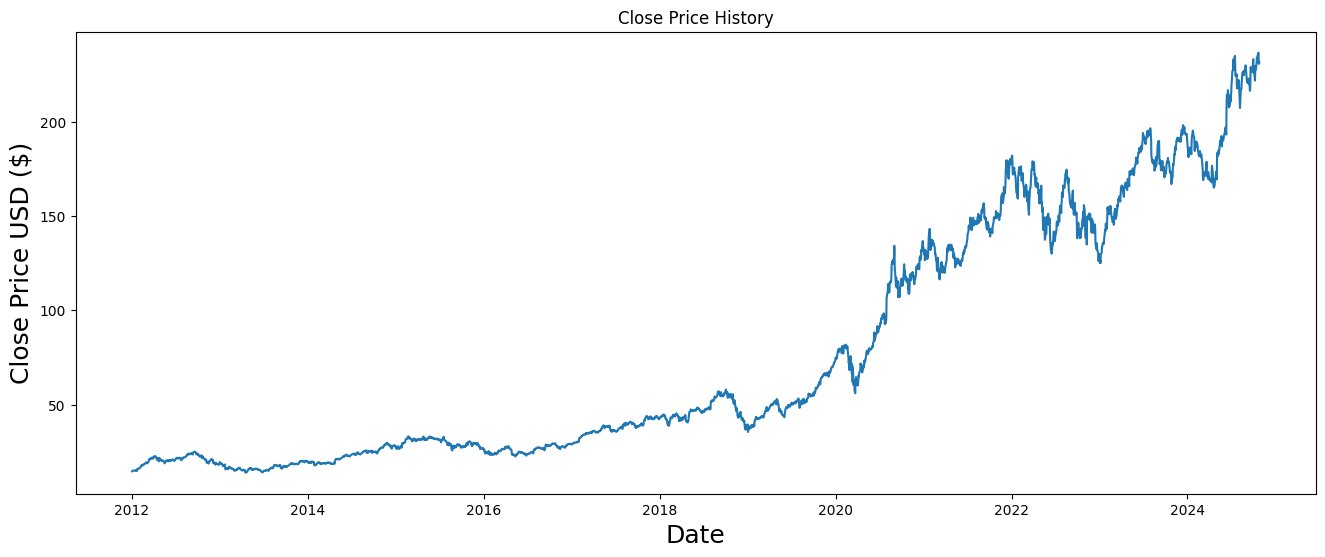

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

4740

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

ValueError: Found array with 0 feature(s) (shape=(4989, 0)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch data
df = yf.download('AAPL', start='2005-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Ensure 'Close' column exists, if not, create it
if 'Close' not in df.columns:
    # Assuming you want to use 'Adj Close' if 'Close' is missing
    df['Close'] = df['Adj Close']
    # Or, if you have another column in mind, replace 'Adj Close' with that column name

# Create a new dataframe with only the 'Close' column
data = df[['Close']] # Use double brackets to ensure a DataFrame is created
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
if 'Close' in df.columns:
    data = df.filter(['Close'])
else:
    data = df.filter(['close'])  # Assuming the column name is 'close'

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


4740

In [ ]:

import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch data
df = yf.download('AAPL', start='2005-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Ensure 'Close' column exists, if not, create it
if 'Close' not in df.columns:
    # Assuming you want to use 'Adj Close' if 'Close' is missing
    df['Close'] = df['Adj Close']
    # Or, if you have another column in mind, replace 'Adj Close' with that column name

# Create a new dataframe with only the 'Close' column
data = df[['Close']] # Use double brackets to ensure a DataFrame is created
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

[*********************100%***********************]  1 of 1 completed


array([[0.00000000e+00],
       [4.93177851e-05],
       [9.18076863e-05],
       ...,
       [9.74888494e-01],
       [9.78457633e-01],
       [9.86913090e-01]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00000000e+00, 4.93177851e-05, 9.18076863e-05, 9.56020245e-05,
       4.52211561e-04, 4.30210376e-04, 9.63582582e-05, 1.64648241e-04,
       4.93945228e-04, 5.24291829e-04, 5.58436820e-04, 5.00012826e-04,
       5.44019754e-04, 5.46297066e-04, 5.66781730e-04, 6.64661573e-04,
       6.79838926e-04, 7.09428787e-04, 8.11098916e-04, 1.03265412e-03,
       1.08045539e-03, 1.23979277e-03, 1.10170034e-03, 1.17985175e-03,
       1.18744094e-03, 1.33615559e-03, 1.17226308e-03, 1.14343401e-03,
       1.35967785e-03, 1.61916834e-03, 1.90597542e-03, 2.03647918e-03,
       1.86045147e-03, 1.78457737e-03, 1.66924692e-03, 1.89231915e-03,
       1.94543127e-03, 1.94998235e-03, 2.00537229e-03, 1.95074264e-03,
       1.89307538e-03, 1.53949939e-03, 1.69428620e-03, 1.68518050e-03,
       1.34829484e-03, 1.16922953e-03, 1.24207008e-03, 1.30883848e-03,
       1.31642767e-03, 1.41354672e-03, 1.44693091e-03, 1.60930640e-03,
       1.71704818e-03, 1.82934053e-03, 1.69732026e-03, 1.65482985e-03,
     

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4680/4680 ━━━━━━━━━━━━━━━━━━━━ 268s 57ms/step - loss: 0.0011


In [ ]:

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step


4.748376773942589

<ipython-input-7-06b834536bfe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


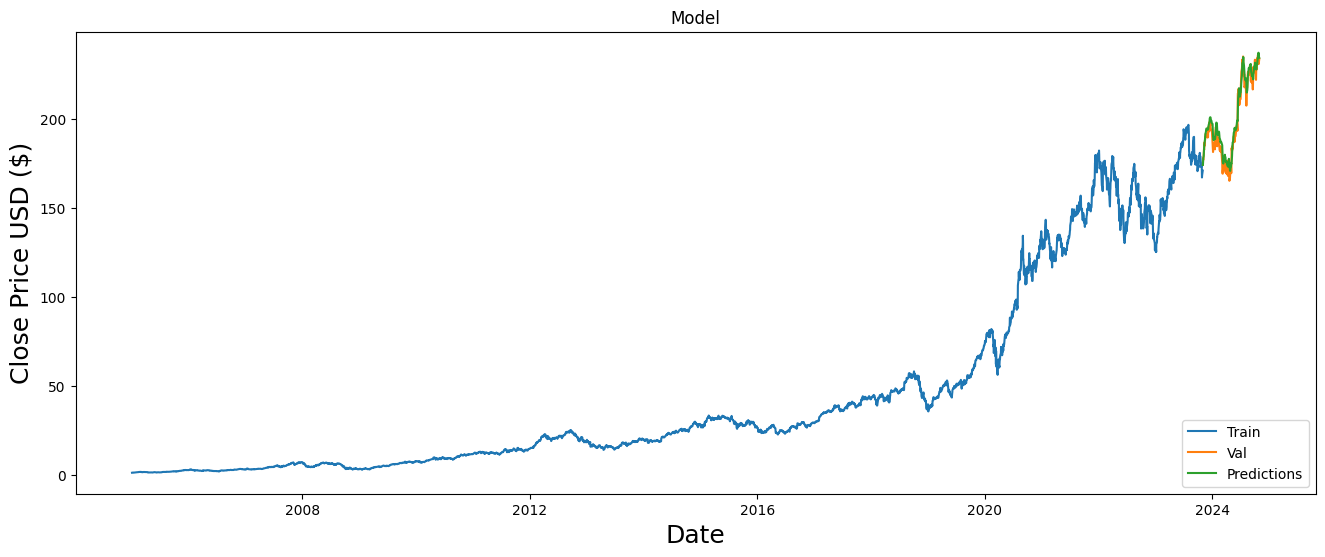

In [ ]:
import matplotlib.pyplot as plt
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2023-11-01 00:00:00+00:00,173.970001,173.926193
2023-11-02 00:00:00+00:00,177.570007,175.201843
2023-11-03 00:00:00+00:00,176.649994,177.392197
2023-11-06 00:00:00+00:00,179.229996,178.965485
2023-11-07 00:00:00+00:00,181.820007,180.658936
...,...,...
2024-10-22 00:00:00+00:00,235.860001,236.182632
2024-10-23 00:00:00+00:00,230.759995,236.930313


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=valid)

https://docs.google.com/spreadsheets/d/1a62Un8t3RSnMGsmHGJExiyCtosV6zptyuWyT-hT30KM#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


APIError: {'code': 400, 'message': 'Invalid values[0][0]: list_value {\n  values {\n    string_value: "Close"\n  }\n  values {\n    string_value: "AAPL"\n  }\n}\n', 'status': 'INVALID_ARGUMENT'}

In [2]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.31893362e-03, 1.30915180e-03, 1.00428027e-03, 5.54310805e-04,
       5.05407544e-05, 0.00000000e+00, 2.70634579e-04, 2.60852469e-04,
       2.03792057e-04, 3.81495574e-04, 6.58652434e-04, 6.66803171e-04,
       7.89077648e-04, 9.96129534e-04, 7.33645693e-04, 7.20604046e-04,
       8.47769140e-04, 8.95047734e-04, 8.39618402e-04, 7.74404629e-04,
       8.02119295e-04, 7.41799054e-04, 6.74953909e-04, 8.34727493e-04,
       1.00264919e-03, 8.90156824e-04, 7.58100530e-04, 6.17893497e-04,
       6.19524578e-04, 5.26596139e-04, 3.42368009e-04, 2.93458335e-04,
       4.10841611e-04, 4.85837203e-04, 5.46160067e-04, 4.84206122e-04,
       4.87468283e-04, 5.38006705e-04, 7.05931027e-04, 5.54310805e-04,
       6.68434252e-04, 6.43979415e-04, 6.35826345e-04, 6.63543343e-04,
       5.99960650e-04, 7.58100530e-04, 8.57551250e-04, 8.55919878e-04,
       7.72773549e-04, 8.31465041e-04, 8.00490546e-04, 7.12453017e-04,
       8.02119295e-04, 8.67333068e-04, 1.00754010e-03, 8.37987322e-04,
     

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3369/3369 ━━━━━━━━━━━━━━━━━━━━ 276s 81ms/step - loss: 0.0032


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
import matplotlib.pyplot as plt
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch data
df = yf.download('NVDA', start='2005-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Ensure 'Close' column exists, if not, create it
if 'Close' not in df.columns:
    # Assuming you want to use 'Adj Close' if 'Close' is missing
    df['Close'] = df['Adj Close']
    # Or, if you have another column in mind, replace 'Adj Close' with that column name

# Create a new dataframe with only the 'Close' column
data = df[['Close']] # Use double brackets to ensure a DataFrame is created
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

[*********************100%***********************]  1 of 1 completed


array([[3.41314811e-04],
       [2.76882946e-04],
       [2.89072705e-04],
       ...,
       [9.84884539e-01],
       [9.77779697e-01],
       [9.82864560e-01]])

In [5]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00034131, 0.00027688, 0.00028907, 0.0002763 , 0.00025134,
       0.00025424, 0.00021477, 0.00020432, 0.0002171 , 0.00022116,
       0.00024089, 0.00021187, 0.00021477, 0.0002171 , 0.00016717,
       0.00018807, 0.00020374, 0.00030243, 0.00030068, 0.000303  ,
       0.00032796, 0.00040343, 0.00038833, 0.0004696 , 0.0004516 ,
       0.00046612, 0.00041388, 0.00044754, 0.0004905 , 0.00045857,
       0.00047192, 0.0004667 , 0.00045334, 0.00061355, 0.00063445,
       0.00058046, 0.00062284, 0.00064664, 0.00065535, 0.00065128,
       0.00060195, 0.00057989, 0.00057292, 0.00058917, 0.00050733,
       0.00046727, 0.0004667 , 0.00043303, 0.00047424, 0.00044406,
       0.0004191 , 0.00040458, 0.00037556, 0.00042374, 0.00039762,
       0.00042838, 0.00043129, 0.00041503, 0.00038311, 0.00038311])]
[0.0003517631910814427]

[array([0.00034131, 0.00027688, 0.00028907, 0.0002763 , 0.00025134,
       0.00025424, 0.00021477, 0.00020432, 0.0002171 , 0.00022116,
       0.00024089, 0.00021187, 0.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4681/4681 ━━━━━━━━━━━━━━━━━━━━ 289s 61ms/step - loss: 3.1809e-04


In [1]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

NameError: name 'scaled_data' is not defined

In [ ]:
import matplotlib.pyplot as plt
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()